In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com
import numpy as np
import pandas as pd
import itertools
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

# Preprocessing function

In [3]:
def get_coef(x):
    if x=='  ':
        return 'none'
    if '*' in x:
        x = x[:x.find('*')]
    elif '. ' in x:
        x = x[:x.find('. ')]
    else:
        x = x[:x.find(' ')]
    return float(x)
def get_ci(x):
    if x=='  ':
        return 'none'
    x = x[x.find('(')+1:x.find(')')]
    if x!='NA':
        return float(x)*1.96
    else:
        return 0
def get_star(x):
    if x=='  ':
        return 'none'
    if '***' in x:
        return '***'
    elif '**' in x:
        return '**'
    elif '*' in x:
        return '*'
    else:
        return ' '

# Reg 1

In [4]:
labellst = ['Switch score', 'Funding', 'ln(Reference)','ln(Team size)', 'International team', 'Interdiscipinary team', 'ln(Career age)','Focal field', 'ln(Past publication)','Year FE','Field FE','Author FE','Journal FE']

In [5]:
reg1 = pd.read_csv(r'F:\A J YANG PAPER\Working paper (under review)\IPM switch and disruption\Tables\reg11.csv')

reg1 = reg1.drop([0,1,2] , axis=0)

In [6]:
def draw_reg(col , ax , i , yticks = True):
    d1 = reg1[[col]].head(9).copy()
    d1['coef1'] = d1[d1.columns[0]].apply(get_coef)
    d1['star1'] = d1[d1.columns[0]].apply(get_star)
    d1['ci1'] = d1[d1.columns[0]].apply(get_ci)

    for _ in range(9):
        if d1['coef1'].values[_]!='none':
            if float(d1['coef1'].values[_])>0:
                color = '#D35400'
            else:
                color = '#2471A3'
            ax.plot(d1['coef1'].values[_],8-_, marker='o',color=color,alpha=.8, markersize = 7 )
            ax.errorbar(d1['coef1'].values[_],8-_, xerr = d1['ci1'].values[_] ,ecolor=color, elinewidth=3 , capsize= 3 )
            plt.axhline(8-_, c = '#85929E', linestyle = '--', linewidth = 1)
            ax.text(d1['coef1'].values[_],8-_+.06,d1['star1'].values[_],c = color, fontsize=20, ha='center', fontweight='bold')
            
    for _ in [1,2,3,4]: # FE text
        if reg1[col].values[_+10] =='No':
            ax.text(0,-_-.1,reg1[col].values[_+10],c = '#1C2833', fontsize=16, ha='center')
        else:
            ax.text(0,-_-.1,reg1[col].values[_+10],c = '#1C2833', fontsize=16, ha='center', fontweight='bold')
    plt.xticks([-0.004,0,0.004],fontsize=16,)
    plt.xlabel('Obs. '+reg1['reg1'].values[18] , fontsize = 20)
    if yticks:
        plt.yticks(range(-4,len(labellst)-4),labellst[::-1],fontsize=20,)
    else:
        plt.yticks([])
    plt.xlim(-0.006,0.006)
    plt.ylim(-4.5,8.5)
    plt.title('Model ({})\nDisruption score'.format(i),fontsize = 20)
    # plt.axvline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
    ax.vlines(0, -0.5 , 100 , color = '#A93226',alpha=.7, linestyle = '--', linewidth = 2.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

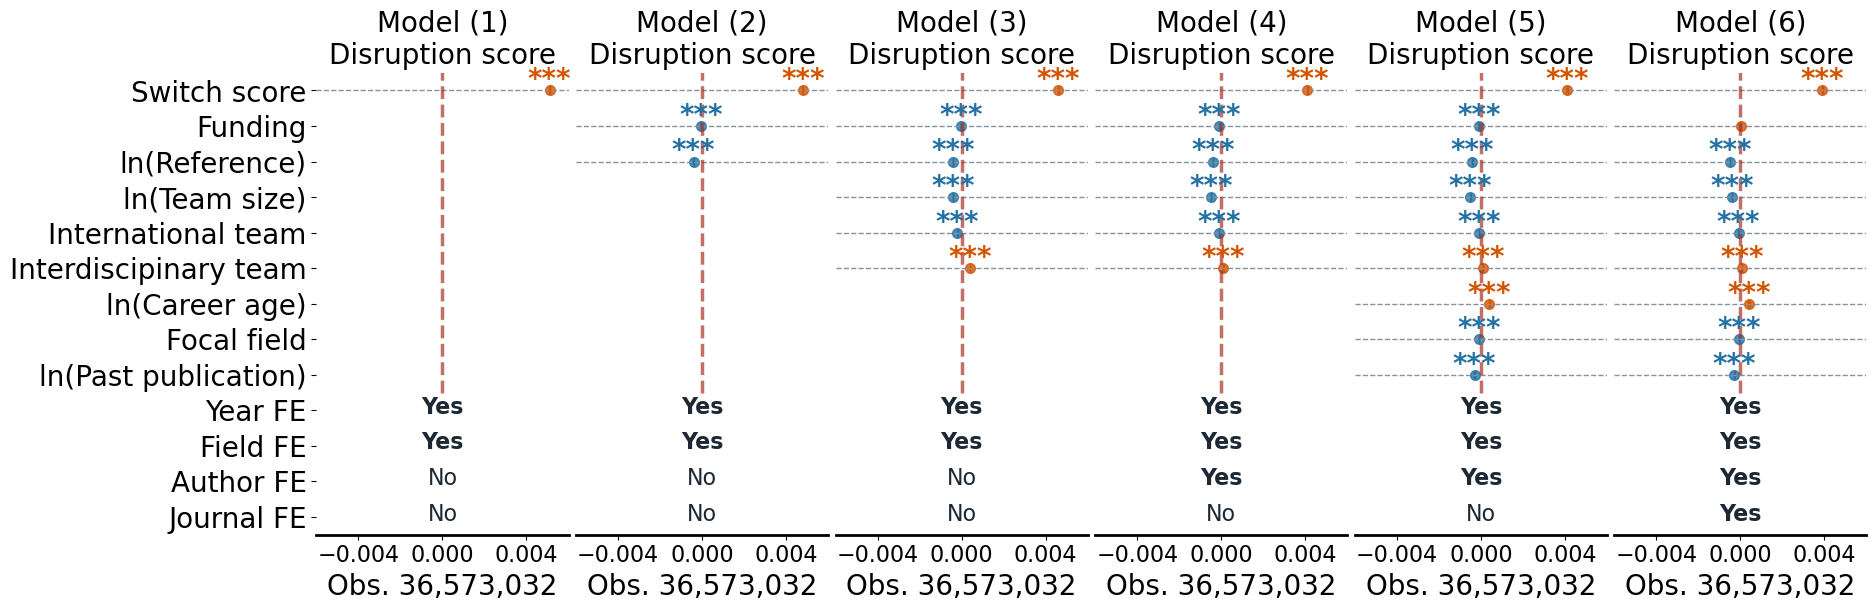

In [7]:
plt.subplots(1,6,figsize=(20,6),sharex=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.03,hspace=0)
draw_reg('reg3' , plt.subplot(1,6,1) , 1 , 1)
for i in range(1,6):
    draw_reg('reg{}'.format(i+3) , plt.subplot(1,6,i+1) , i+1 , 0)

plt.savefig(savepath+"1a.svg",bbox_inches = 'tight')

In [8]:
def draw_reg(col , ax , i , yticks = True):
    d1 = reg1[[col]].head(9).copy()
    d1['coef1'] = d1[d1.columns[0]].apply(get_coef)
    d1['star1'] = d1[d1.columns[0]].apply(get_star)
    d1['ci1'] = d1[d1.columns[0]].apply(get_ci)

    for _ in range(9):
        if d1['coef1'].values[_]!='none':
            if float(d1['coef1'].values[_])>0:
                color = '#D35400'
            else:
                color = '#2471A3'
            ax.plot(d1['coef1'].values[_],8-_, marker='o',color=color,alpha=.8, markersize = 7 )
            ax.errorbar(d1['coef1'].values[_],8-_, xerr = d1['ci1'].values[_] ,ecolor=color, elinewidth=3 , capsize= 3 )
            plt.axhline(8-_, c = '#85929E', linestyle = '--', linewidth = 1)
            ax.text(d1['coef1'].values[_],8-_+.06,d1['star1'].values[_],c = color, fontsize=20, ha='center', fontweight='bold')
            
    for _ in [1,2,3,4]: # FE text
        if reg1[col].values[_+10] =='No':
            ax.text(0,-_-.1,reg1[col].values[_+10],c = '#1C2833', fontsize=16, ha='center')
        else:
            ax.text(0,-_-.1,reg1[col].values[_+10],c = '#1C2833', fontsize=16, ha='center', fontweight='bold')
    plt.xticks([-2,-1,0,1,2],fontsize=16,)
    plt.xlabel('Obs. '+reg1['reg1'].values[18] , fontsize = 20)
    if yticks:
        plt.yticks(range(-4,len(labellst)-4),labellst[::-1],fontsize=20,)
    else:
        plt.yticks([])
    plt.xlim(-2.4,2.4)
    plt.ylim(-4.5,8.5)
    plt.title('Model ({})\nDisruption > 0'.format(i+6),fontsize = 20)
    # plt.axvline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
    ax.vlines(0, -0.5 , 100 , color = '#A93226',alpha=.7, linestyle = '--', linewidth = 2.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

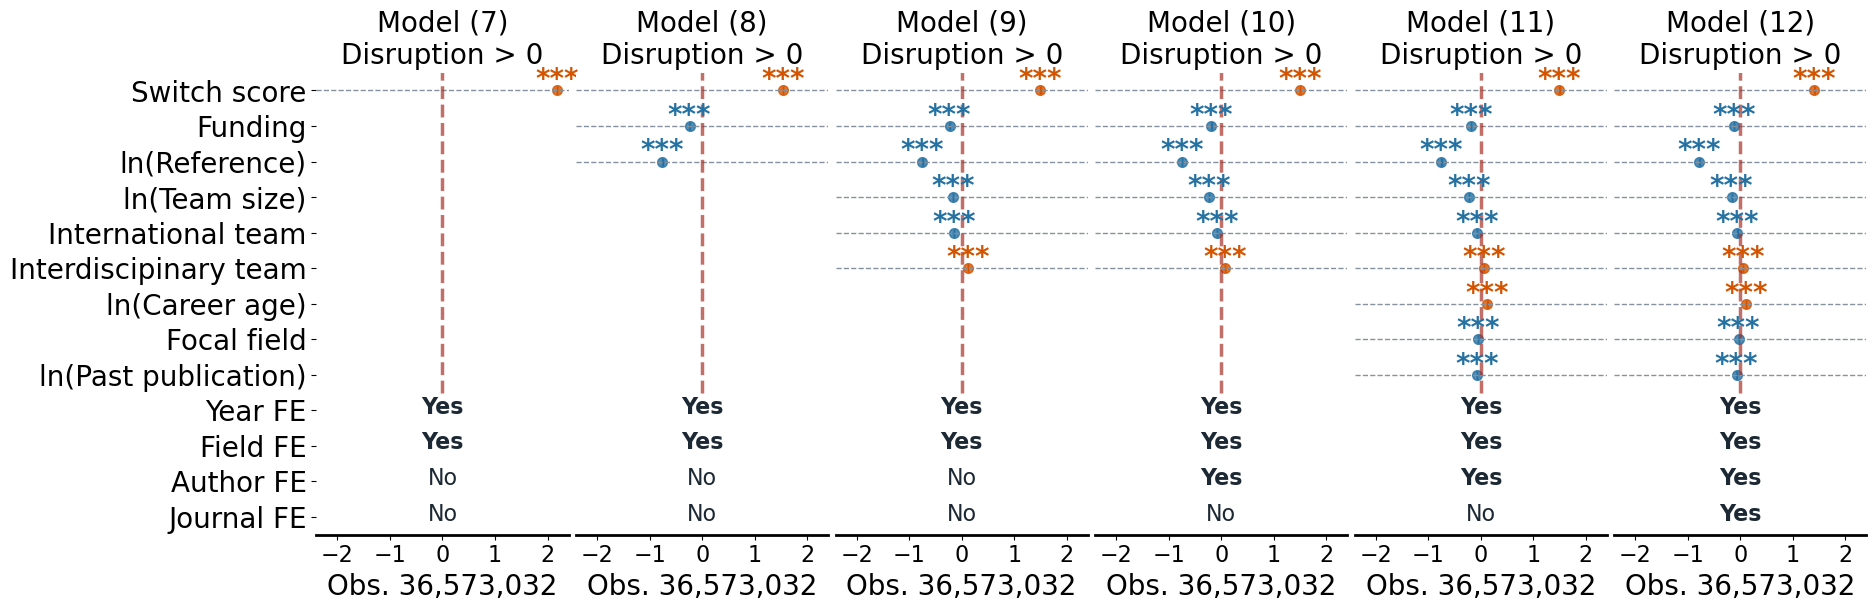

In [9]:
plt.subplots(1,6,figsize=(20,6),sharex=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.03,hspace=0)
draw_reg('reg11' , plt.subplot(1,6,1) , 1 , 1)
for i in range(1,6):
    draw_reg('reg{}'.format(i+11) , plt.subplot(1,6,i+1) , i+1 , 0)

plt.savefig(savepath+"1b.svg",bbox_inches = 'tight')

# Reg 2

In [10]:
reg2 = pd.read_csv(r'F:\A J YANG PAPER\Working paper (under review)\IPM switch and disruption\Tables\reg2.csv')

reg2 = reg2.drop([0,1,2] , axis=0)

In [11]:
def draw_reg(col , ax , i , yticks = True):
    d1 = reg2[[col]].head(9).copy()
    d1['coef1'] = d1[d1.columns[0]].apply(get_coef)
    d1['star1'] = d1[d1.columns[0]].apply(get_star)
    d1['ci1'] = d1[d1.columns[0]].apply(get_ci)

    for _ in range(9):
        if d1['coef1'].values[_]!='none':
            if float(d1['coef1'].values[_])>0:
                color = '#D35400'
            else:
                color = '#2471A3'
            ax.plot(d1['coef1'].values[_],8-_, marker='o',color=color,alpha=.8, markersize = 7 )
            ax.errorbar(d1['coef1'].values[_],8-_, xerr = d1['ci1'].values[_] ,ecolor=color, elinewidth=3 , capsize= 3 )
            plt.axhline(8-_, c = '#85929E', linestyle = '--', linewidth = 1)
            ax.text(d1['coef1'].values[_],8-_+.06,d1['star1'].values[_],c = color, fontsize=20, ha='center', fontweight='bold')
            
    for _ in [1,2,3,4]: # FE text
        if reg2[col].values[_+10] =='No':
            ax.text(0,-_-.1,reg2[col].values[_+10],c = '#1C2833', fontsize=16, ha='center')
        else:
            ax.text(0,-_-.1,reg2[col].values[_+10],c = '#1C2833', fontsize=16, ha='center', fontweight='bold')
    plt.xticks([-1,0,1],fontsize=16,)
    plt.xlabel('Obs. '+reg2['reg2'].values[18] , fontsize = 20)
    if yticks:
        plt.yticks(range(-4,len(labellst)-4),labellst[::-1],fontsize=20,)
    else:
        plt.yticks([])
    plt.xlim(-1.2,1.2)
    plt.ylim(-4.5,8.5)
    plt.title('Model ({})\nln(Citation)'.format(i),fontsize = 20)
    # plt.axvline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
    ax.vlines(0, -0.5 , 100 , color = '#A93226',alpha=.7, linestyle = '--', linewidth = 2.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

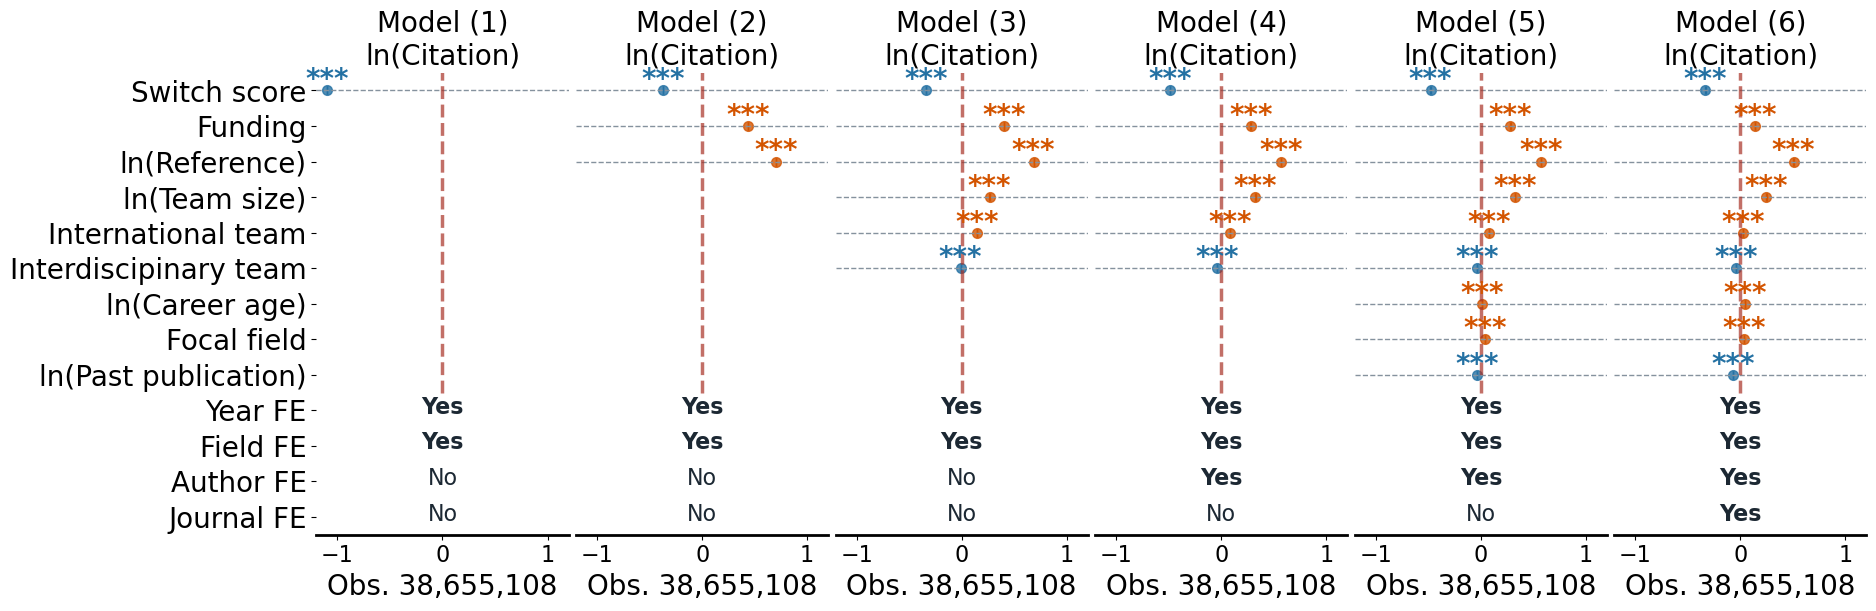

In [12]:
plt.subplots(1,6,figsize=(20,6),sharex=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.03,hspace=0)
draw_reg('reg3' , plt.subplot(1,6,1) , 1 , 1)
for i in range(1,6):
    draw_reg('reg{}'.format(i+3) , plt.subplot(1,6,i+1) , i+1 , 0)

plt.savefig(savepath+"2a.svg",bbox_inches = 'tight')

In [13]:
def draw_reg(col , ax , i , yticks = True):
    d1 = reg2[[col]].head(9).copy()
    d1['coef1'] = d1[d1.columns[0]].apply(get_coef)
    d1['star1'] = d1[d1.columns[0]].apply(get_star)
    d1['ci1'] = d1[d1.columns[0]].apply(get_ci)

    for _ in range(9):
        if d1['coef1'].values[_]!='none':
            if float(d1['coef1'].values[_])>0:
                color = '#D35400'
            else:
                color = '#2471A3'
            ax.plot(d1['coef1'].values[_],8-_, marker='o',color=color,alpha=.8, markersize = 7 )
            ax.errorbar(d1['coef1'].values[_],8-_, xerr = d1['ci1'].values[_] ,ecolor=color, elinewidth=3 , capsize= 3 )
            plt.axhline(8-_, c = '#85929E', linestyle = '--', linewidth = 1)
            ax.text(d1['coef1'].values[_],8-_+.06,d1['star1'].values[_],c = color, fontsize=20, ha='center', fontweight='bold')
            
    for _ in [1,2,3,4]: # FE text
        if reg2[col].values[_+10] =='No':
            ax.text(0,-_-.1,reg2[col].values[_+10],c = '#1C2833', fontsize=16, ha='center')
        else:
            ax.text(0,-_-.1,reg2[col].values[_+10],c = '#1C2833', fontsize=16, ha='center', fontweight='bold')
    plt.xticks([-1,0,1],fontsize=16,)
    plt.xlabel('Obs. '+reg2['reg2'].values[18] , fontsize = 20)
    if yticks:
        plt.yticks(range(-4,len(labellst)-4),labellst[::-1],fontsize=20,)
    else:
        plt.yticks([])
    plt.xlim(-1.8,1.8)
    plt.ylim(-4.5,8.5)
    plt.title('Model ({})\nTop 5% cited'.format(i+6),fontsize = 20)
    # plt.axvline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
    ax.vlines(0, -0.5 , 100 , color = '#A93226',alpha=.7, linestyle = '--', linewidth = 2.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

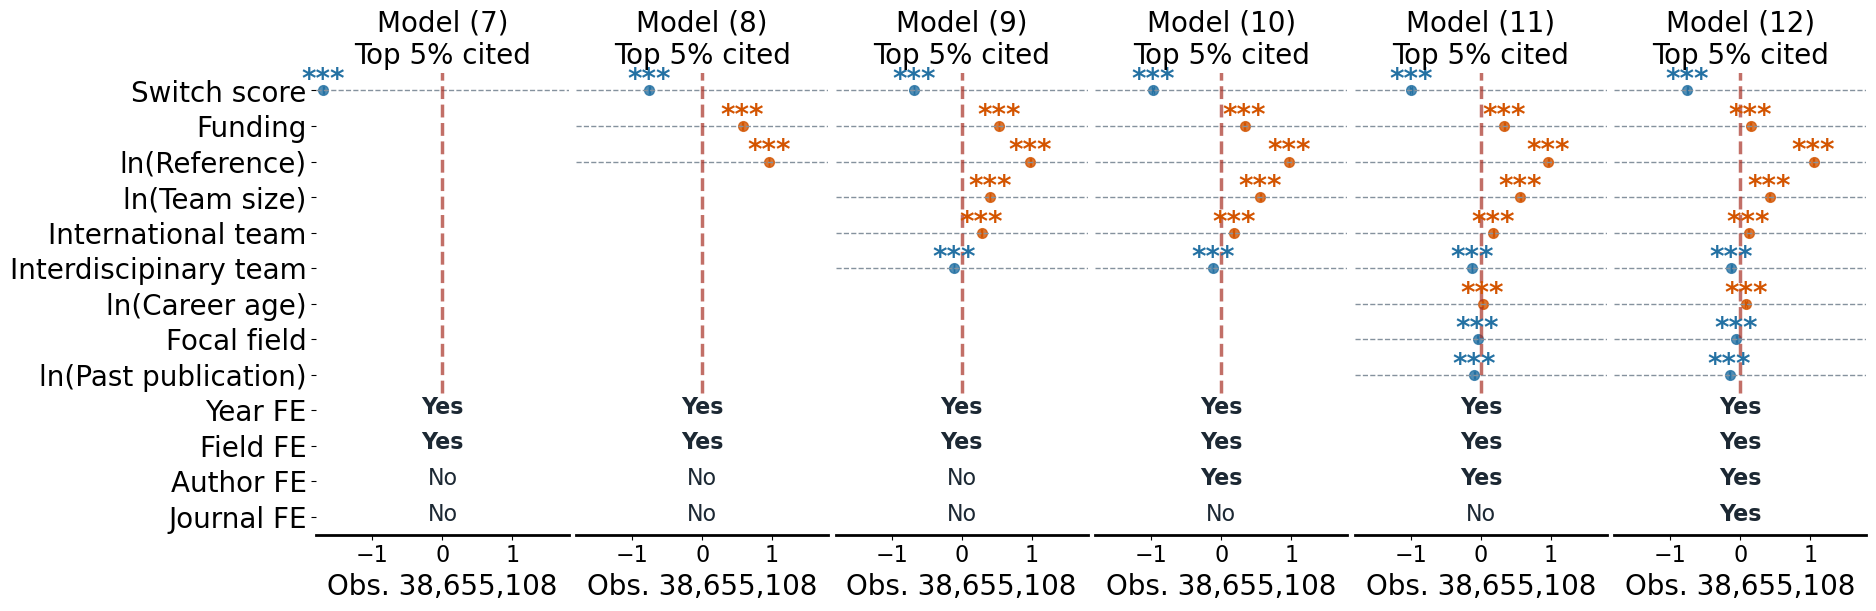

In [14]:
plt.subplots(1,6,figsize=(20,6),sharex=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.03,hspace=0)
draw_reg('reg11' , plt.subplot(1,6,1) , 1 , 1)
for i in range(1,6):
    draw_reg('reg{}'.format(i+11) , plt.subplot(1,6,i+1) , i+1 , 0)

plt.savefig(savepath+"2b.svg",bbox_inches = 'tight')

In [15]:
def draw_reg(col , ax , i , yticks = True):
    d1 = reg2[[col]].head(9).copy()
    d1['coef1'] = d1[d1.columns[0]].apply(get_coef)
    d1['star1'] = d1[d1.columns[0]].apply(get_star)
    d1['ci1'] = d1[d1.columns[0]].apply(get_ci)

    for _ in range(9):
        if d1['coef1'].values[_]!='none':
            if float(d1['coef1'].values[_])>0:
                color = '#D35400'
            else:
                color = '#2471A3'
            ax.plot(d1['coef1'].values[_],8-_, marker='o',color=color,alpha=.8, markersize = 7 )
            ax.errorbar(d1['coef1'].values[_],8-_, xerr = d1['ci1'].values[_] ,ecolor=color, elinewidth=3 , capsize= 3 )
            plt.axhline(8-_, c = '#85929E', linestyle = '--', linewidth = 1)
            ax.text(d1['coef1'].values[_],8-_+.06,d1['star1'].values[_],c = color, fontsize=20, ha='center', fontweight='bold')
            
    for _ in [1,2,3,4]: # FE text
        if reg2[col].values[_+10] =='No':
            ax.text(0,-_-.1,reg2[col].values[_+10],c = '#1C2833', fontsize=16, ha='center')
        else:
            ax.text(0,-_-.1,reg2[col].values[_+10],c = '#1C2833', fontsize=16, ha='center', fontweight='bold')
    plt.xticks([-.1,0,.1],fontsize=16,)
    plt.xlabel('Obs. '+reg2['reg2'].values[18] , fontsize = 20)
    if yticks:
        plt.yticks(range(-4,len(labellst)-4),labellst[::-1],fontsize=20,)
    else:
        plt.yticks([])
    plt.xlim(-0.12,0.12)
    plt.ylim(-4.5,8.5)
    plt.title('Model ({})\nP (External cit)'.format(i+6),fontsize = 20)
    # plt.axvline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
    ax.vlines(0, -0.5 , 100 , color = '#A93226',alpha=.7, linestyle = '--', linewidth = 2.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

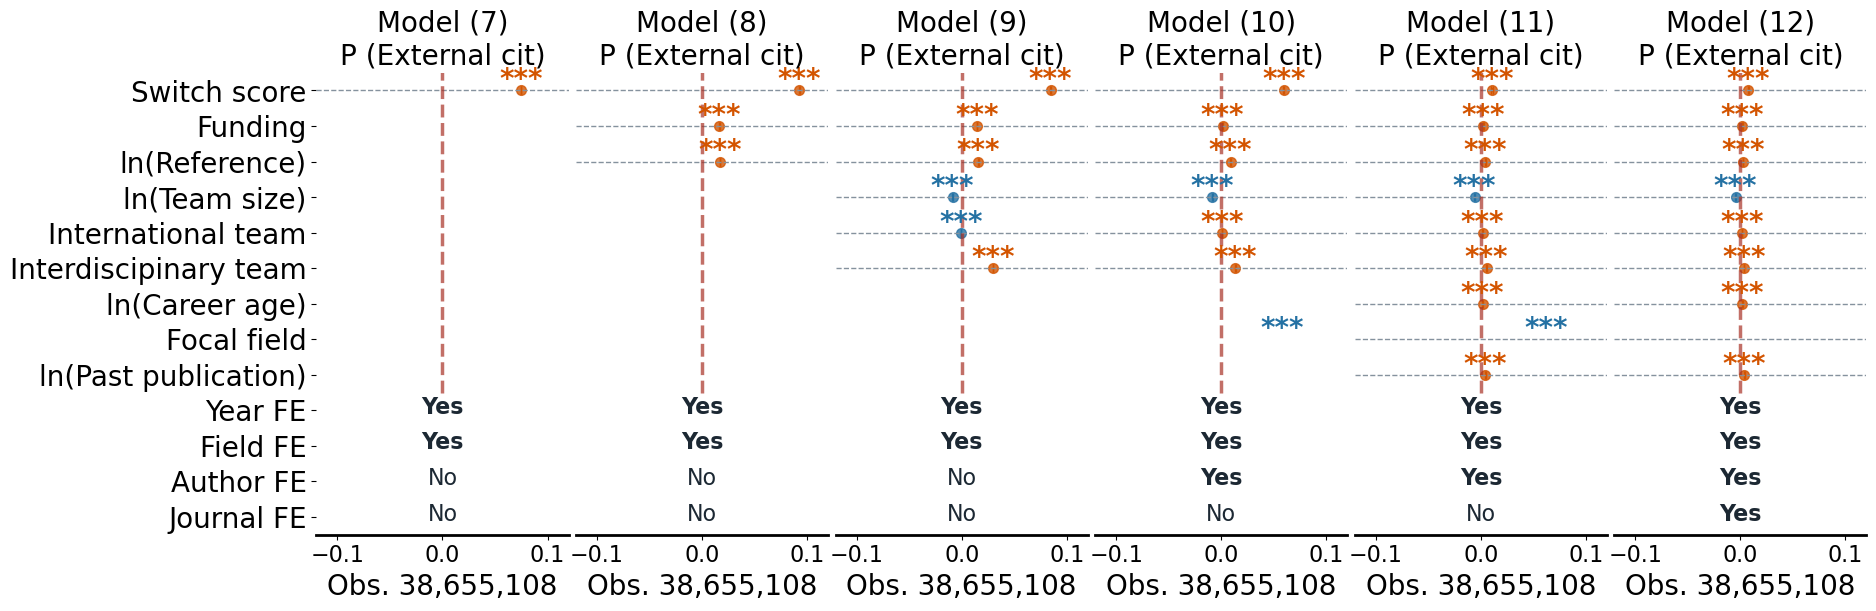

In [16]:
plt.subplots(1,6,figsize=(20,6),sharex=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.03,hspace=0)
draw_reg('reg19' , plt.subplot(1,6,1) , 1 , 1)
for i in range(1,6):
    draw_reg('reg{}'.format(i+19) , plt.subplot(1,6,i+1) , i+1 , 0)

plt.savefig(savepath+"2c.svg",bbox_inches = 'tight')

# Reg 3

In [17]:
reg3 = pd.read_csv(r'F:\A J YANG PAPER\Working paper (under review)\IPM switch and disruption\Tables\reg3.csv')

reg3 = reg3.drop([0,1,2] , axis=0)

In [18]:
def draw_reg(col , ax , i , yticks = True):
    d1 = reg3[[col]].head(9).copy()
    d1['coef1'] = d1[d1.columns[0]].apply(get_coef)
    d1['star1'] = d1[d1.columns[0]].apply(get_star)
    d1['ci1'] = d1[d1.columns[0]].apply(get_ci)

    for _ in range(9):
        if d1['coef1'].values[_]!='none':
            if float(d1['coef1'].values[_])>0:
                color = '#D35400'
            else:
                color = '#2471A3'
            ax.plot(d1['coef1'].values[_],8-_, marker='o',color=color,alpha=.8, markersize = 7 )
            ax.errorbar(d1['coef1'].values[_],8-_, xerr = d1['ci1'].values[_] ,ecolor=color, elinewidth=3 , capsize= 3 )
            plt.axhline(8-_, c = '#85929E', linestyle = '--', linewidth = 1)
            ax.text(d1['coef1'].values[_],8-_+.06,d1['star1'].values[_],c = color, fontsize=20, ha='center', fontweight='bold')
            
    for _ in [1,2,3,4]: # FE text
        if reg3[col].values[_+10] =='No':
            ax.text(0,-_-.1,reg3[col].values[_+10],c = '#1C2833', fontsize=16, ha='center')
        else:
            ax.text(0,-_-.1,reg3[col].values[_+10],c = '#1C2833', fontsize=16, ha='center', fontweight='bold')
    plt.xticks([-.02,0,.02],fontsize=16,)
    plt.xlabel('Obs. '+reg3['reg3'].values[18] , fontsize = 20)
    if yticks:
        plt.yticks(range(-4,len(labellst)-4),labellst[::-1],fontsize=20,)
    else:
        plt.yticks([])
    plt.xlim(-.03,.03)
    plt.ylim(-4.5,8.5)
    plt.title('Model ({})\nRao Stirling'.format(i),fontsize = 20)
    # plt.axvline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
    ax.vlines(0, -0.5 , 100 , color = '#A93226',alpha=.7, linestyle = '--', linewidth = 2.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

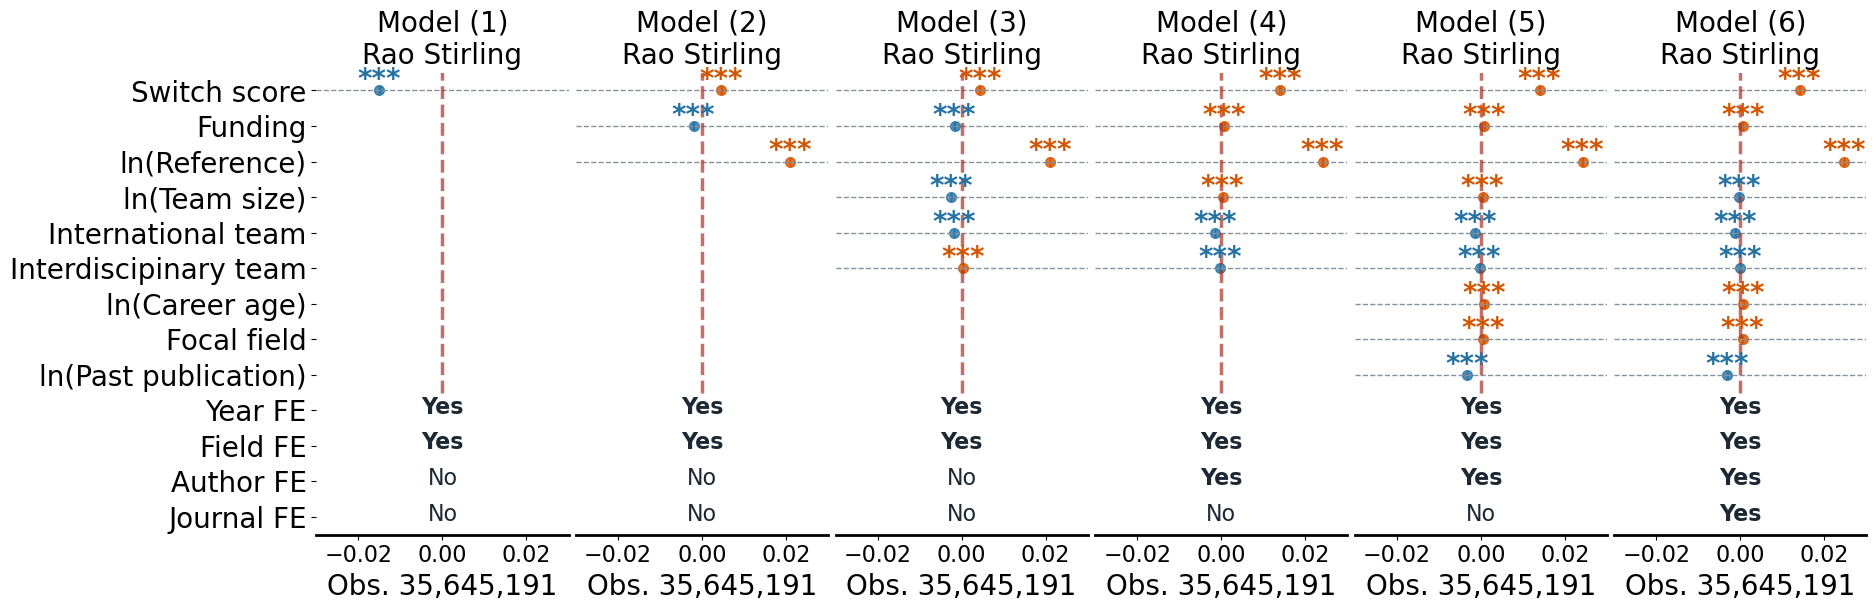

In [19]:
plt.subplots(1,6,figsize=(20,6),sharex=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.03,hspace=0)
draw_reg('reg3' , plt.subplot(1,6,1) , 1 , 1)
for i in range(1,6):
    draw_reg('reg{}'.format(i+3) , plt.subplot(1,6,i+1) , i+1 , 0)

plt.savefig(savepath+"3a.svg",bbox_inches = 'tight')

In [20]:
def draw_reg(col , ax , i , yticks = True):
    d1 = reg3[[col]].head(9).copy()
    d1['coef1'] = d1[d1.columns[0]].apply(get_coef)
    d1['star1'] = d1[d1.columns[0]].apply(get_star)
    d1['ci1'] = d1[d1.columns[0]].apply(get_ci)

    for _ in range(9):
        if d1['coef1'].values[_]!='none':
            if float(d1['coef1'].values[_])>0:
                color = '#D35400'
            else:
                color = '#2471A3'
            ax.plot(d1['coef1'].values[_],8-_, marker='o',color=color,alpha=.8, markersize = 7 )
            ax.errorbar(d1['coef1'].values[_],8-_, xerr = d1['ci1'].values[_] ,ecolor=color, elinewidth=3 , capsize= 3 )
            plt.axhline(8-_, c = '#85929E', linestyle = '--', linewidth = 1)
            ax.text(d1['coef1'].values[_],8-_+.06,d1['star1'].values[_],c = color, fontsize=20, ha='center', fontweight='bold')
            
    for _ in [1,2,3,4]: # FE text
        if reg3[col].values[_+10] =='No':
            ax.text(0,-_-.1,reg3[col].values[_+10],c = '#1C2833', fontsize=16, ha='center')
        else:
            ax.text(0,-_-.1,reg3[col].values[_+10],c = '#1C2833', fontsize=16, ha='center', fontweight='bold')
    plt.xticks([-3,-2,-1,0,1,2,3],fontsize=16,)
    plt.xlabel('Obs. '+reg3['reg3'].values[18] , fontsize = 20)
    if yticks:
        plt.yticks(range(-4,len(labellst)-4),labellst[::-1],fontsize=20,)
    else:
        plt.yticks([])
    plt.xlim(-3.4,3.4)
    plt.ylim(-4.5,8.5)
    plt.title('Model ({})\nNovel paper'.format(i+6),fontsize = 20)
    # plt.axvline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
    ax.vlines(0, -0.5 , 100 , color = '#A93226',alpha=.7, linestyle = '--', linewidth = 2.5)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

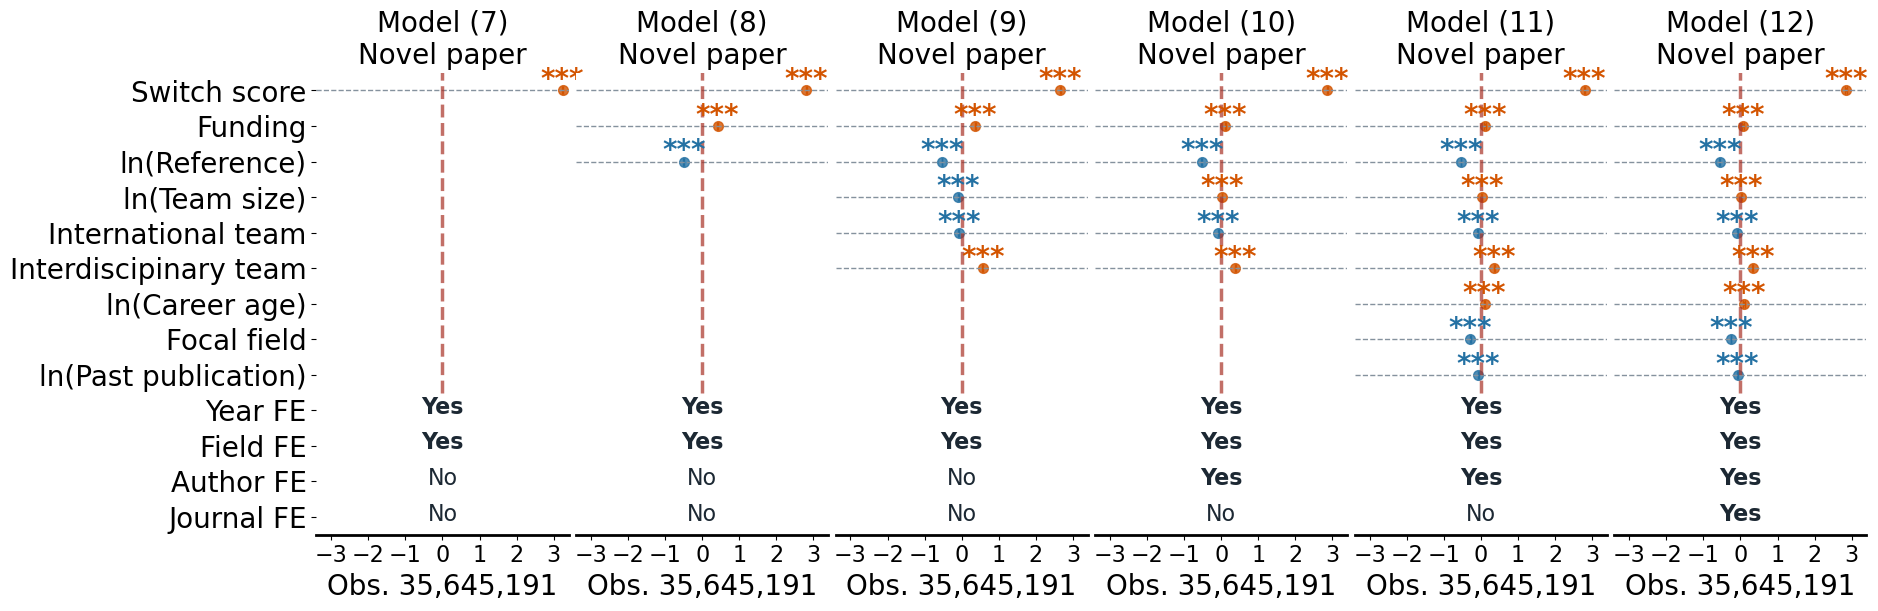

In [21]:
plt.subplots(1,6,figsize=(20,6),sharex=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.03,hspace=0)
draw_reg('reg11' , plt.subplot(1,6,1) , 1 , 1)
for i in range(1,6):
    draw_reg('reg{}'.format(i+11) , plt.subplot(1,6,i+1) , i+1 , 0)

plt.savefig(savepath+"3b.svg",bbox_inches = 'tight')

# Heterogeneity

In [4]:
reg12 = pd.read_csv(r'F:\A J YANG PAPER\Working paper (under review)\IPM switch and disruption\Tables\reg12.csv')

In [5]:
def get_df(dff):
    col = dff['Unnamed: 1'].values
    del dff['Unnamed: 0']
    del dff['Unnamed: 1']
    df = dff.T
    df.columns = col
    df = df[['Sample (Year)','switchScore']]
    df['Sample (Year)'] = df['Sample (Year)'].astype(int)
    return df

reg12 = get_df(reg12)
reg12['coef1'] = reg12[reg12.columns[1]].apply(get_coef)
reg12['star1'] = reg12[reg12.columns[1]].apply(get_star)
reg12['ci1'] =   reg12[reg12.columns[1]].apply(get_ci)

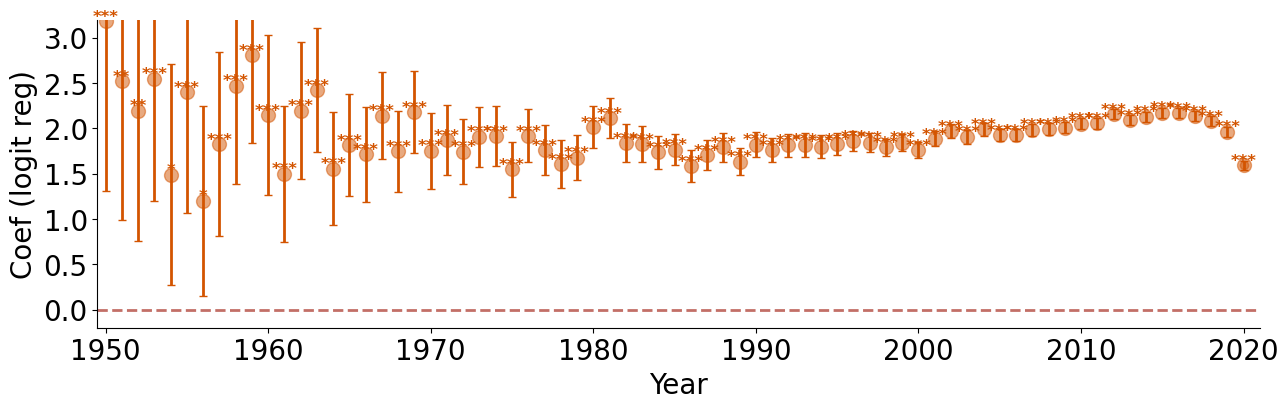

In [6]:
plt.subplots(1,1,figsize=(15,4),sharex = True)
ax = plt.subplot(1,1,1)
for _ in range(len(reg12)):
    ax.plot(reg12['Sample (Year)'].values[_],reg12['coef1'].values[_], marker='o',color='#D35400',alpha=.5, markersize = 10)
    ax.errorbar(reg12['Sample (Year)'].values[_],reg12['coef1'].values[_], yerr = reg12['ci1'].values[_] ,ecolor='#D35400', elinewidth=2 , capsize= 3 )
    ax.text(reg12['Sample (Year)'].values[_],reg12['coef1'].values[_], reg12['star1'].values[_] ,color='#D35400', fontsize=12, ha='center', fontweight='bold')
ax.plot(reg12['Sample (Year)'].values[_],reg12['coef1'].values[_], marker='o',color='#D35400',alpha=.5, markersize = 6)
plt.axhline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
plt.yticks(size = 20)
plt.ylim(-.2,3.2)
plt.xlim(1949.5,2021)
plt.xticks(size = 20)
plt.xlabel('')
plt.ylabel('Coef (logit reg)',fontsize = 20)
plt.xlabel('Year',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(savepath + "4a.svg",bbox_inches = 'tight')

In [7]:
reg13 = pd.read_csv(r'F:\A J YANG PAPER\Working paper (under review)\IPM switch and disruption\Tables\reg13.csv')

In [8]:
fieldIDlst = [1.42362112e+08, 1.38885662e+08, 9.54577280e+07, 1.77444450e+07,
       2.05649164e+08, 1.44133560e+08, 1.44024400e+08, 1.62324750e+08,
       3.94323040e+07, 1.27313418e+08, 1.27413603e+08, 4.10081480e+07,
       1.21332964e+08, 3.39235470e+07, 1.57449670e+07, 1.92562407e+08,
       1.85592680e+08, 8.68032400e+07, 7.19241000e+07]
fieldNamelst = ['Art', 'Philosophy', 'History', 'Political', 'Geography',
       'Business', 'Sociology', 'Economics', 'Environment',
       'Geology', 'Engineering', 'Computer', 'Physics',
       'Mathematics', 'Psychology', 'Material', 'Chemistry',
       'Biology', 'Medicine']
fieldDict = dict(zip(fieldIDlst,fieldNamelst))

In [9]:
def get_df(dff):
    col = dff['Unnamed: 1'].values
    del dff['Unnamed: 0']
    del dff['Unnamed: 1']
    df = dff.T
    df.columns = col
    df = df[['Sample (FieldID)','switchScore']]
    df['Sample (FieldID)'] = df['Sample (FieldID)'].astype(float)
    return df

reg13 = get_df(reg13)
reg13['coef1'] = reg13[reg13.columns[1]].apply(get_coef)
reg13['star1'] = reg13[reg13.columns[1]].apply(get_star)
reg13['ci1'] =   reg13[reg13.columns[1]].apply(get_ci)
d = pd.DataFrame({'Sample (FieldID)':fieldIDlst , 'FieldName':fieldNamelst})
for co in reg13.columns[2:]:
    d[co] = d['Sample (FieldID)'].map(reg13.set_index('Sample (FieldID)')[co])

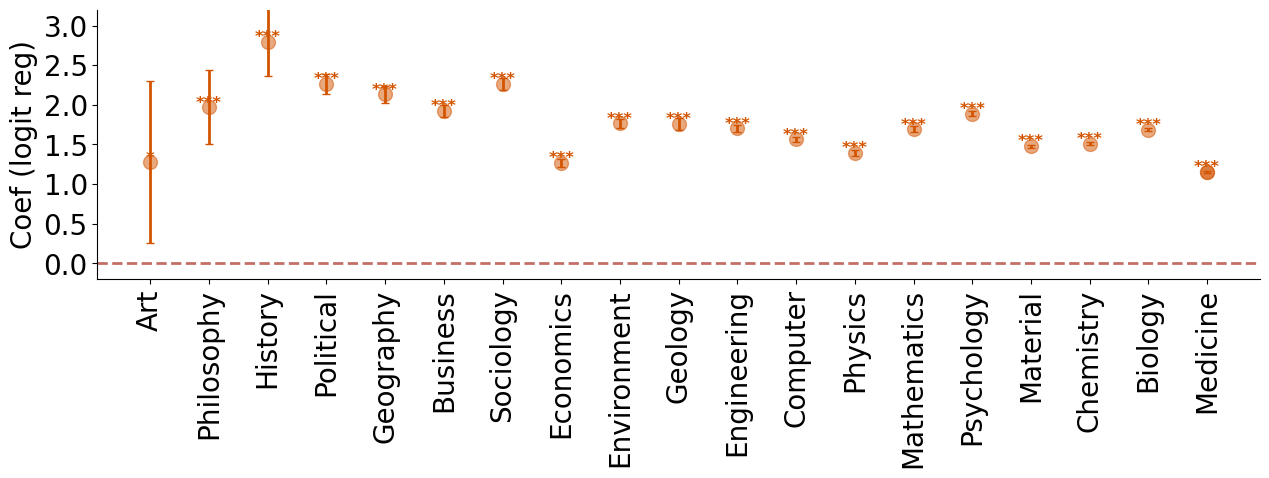

In [11]:
c = '#D35400'
plt.subplots(1,1,figsize=(15,3.5),sharex = True)
ax = plt.subplot(1,1,1)
for _ in range(len(d)):
    ax.plot(d.index[_],d['coef1'].values[_], marker='o',color=c,alpha=.5, markersize = 10)
    ax.errorbar(d.index[_],d['coef1'].values[_], yerr = d['ci1'].values[_] ,ecolor=c, elinewidth=2 , capsize= 3 )
    ax.text(d.index[_],d['coef1'].values[_], d['star1'].values[_] ,color=c, fontsize=12, ha='center', fontweight='bold')
ax.plot(d.index[_],d['coef1'].values[_], marker='o',color=c,alpha=.5, markersize = 10)
plt.axhline(0 , c = '#A93226',alpha=.7, linestyle = '--', linewidth = 2)
plt.yticks(size = 20)
plt.ylim(-.2,3.2)
plt.xticks(d.index,d['FieldName'].values,size = 20,rotation=90)
plt.ylabel('Coef (logit reg)',fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(savepath + "4b.svg",bbox_inches = 'tight')